# Adult Income : Exploratory Analysis And Precition   

This notebook has been created to help you go through the steps of a Machine Learning project Life-Cicle, from Business Understanding to presenting the final result to the Business.  

## 1. Business Understanding 
## 2. Data aquisition  
          Automatique Data aquisition  
          Convert data into a Pandas Data Frame
          
## 3- Data Munging  
          Treating missing values
          Working with outliers
          
## 4- Exploratory Data Analysis 
          Univariate Analysis      
          Bivariate analysis           
          
## 5- Feature Engineering 
          Derived Features
          Categorical Feature encoding
          
## 6- Preparation, Models and Evaluation    
          Preparation
          Models and Evaluation  
          
## 7- Next Step  



## 1- Business Understanding  
Our data contains an individual's annual income results based on various factors (Education level, Occupation,Gender, Age, etc.). 
Given a new individual, our goal is to predict if that person makes more or less than 50K. 

## 2- Data Acquisition  
We are going to acquire our dataset into **text** format, after downloading it from the **[UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/adult)** website. Here are the following libraries that we will be using to acquire the dataset and perform all the preprocessing and analysis.  

In [1]:
import requests
import os

In [2]:
# This function will be used to acquire the data from the UCI website
def aquire_data(path_to_data, data_urls):
    if not os.path.exists(path_to_data):
        os.mkdir(path_to_data)
        
    for url in data_urls:
        data = requests.get(url).content
        filename = os.path.join(path_to_data, os.path.basename(url))
        with open(filename, 'wb') as file: 
            file.write(data)

In [3]:
data_urls = ["https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
             "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names",
             "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"]

aquire_data('data', data_urls)

In [4]:
# Check the success of accessing the data
print('Output n° {}\n'.format(1))
! find data

Output n° 1

data
data/adult.test
data/adult.names
data/adult.data


We can notice that all our data have been acquired from the UCI website. Here we have :  
* **adult.names**: which corresponds to the different column names   
* **adult.data**: corresponds to all the observations in the training data.  
* **data.test**: corresponds to all the observation in the test data  


In [5]:
column_names = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", 
                "Martial Status", "Occupation", "Relationship", "Race", "Sex", 
                "Capital-Gain", "Capital-Loss", "Hours-per-week", "Country", "Income"] 


### Convert Data into a Pandas Data Frame  

In [6]:
import pandas as pd
import numpy as np

Here we are going to acquire the training and the test datasets. 
The corresponding column names have been specified in the previous **column_names** variable. Then, we use the regular expression **' \*, \*'** to trim all the whitespaces we can encounter in our datasets. As all the missing values have been specificied by **?**, so, **na_values** is used to take them into consideration during the data loading. Finally we specify **engine='python'** to avoid the warning that comes after using regular expression syntax.  

In [7]:
train = pd.read_csv('data/adult.data', names=column_names, sep=' *, *', na_values='?', 
                   engine='python')
test = pd.read_csv('data/adult.test', names=column_names, sep=' *, *', skiprows=1, 
                   engine='python', na_values='?')

In [8]:
test.Income.unique() 

array(['<=50K.', '>50K.'], dtype=object)

In [9]:
train.Income.unique()

array(['<=50K', '>50K'], dtype=object)

We need to transform the **Income** column value for test data, in order to remove the **"."** at the end  

In [10]:
test.Income = np.where(test.Income == '<=50K.', '<=50K', '>50K')

In [11]:
# Concatenate train and test. We will split it before the training phase 
df = pd.concat((train, test), axis=0)

In [12]:
df.Income.unique()

array(['<=50K', '>50K'], dtype=object)

In [13]:
print('Output n° {}\n'.format(2))

'''
First 5 observations
'''
df.head()

Output n° 2



,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
print('Output n° {}\n'.format(3))

'''
Last 5 observations
'''
df.tail()

Output n° 3



,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [15]:
print('Output n° {}\n'.format(4))

print('Our data contains {} observations and {} columns.'.format(df.shape[0],
                                                                df.shape[1]))

Output n° 4

Our data contains 48842 observations and 15 columns.


## 3- Data Munging 
In this step, we will perform two main tasks.  
* **Dealing with missing values**    
During data collection, it is very common to face missing data problem, that can occur for many reasons (confidentiality, error,etc.). So, it is very important to understand those problems, in order to fill them using appropriate techniques before applying any Machine Learning algorithm.    


* **Dealing with outliers**     *
Outliers are those values that are far away from the normal values that can be observed in the whole data. They can introduce high bias in our final model performance, and can even lead us to taking wrong conclusion during the analysis step.  

#### A- Treating missing values   
We will use pandas **isnull()** function to look at all the missing values for each column.  

In [16]:
print('Output n° {}\n'.format(5))
print(df.isnull().sum())

Output n° 5

Age                  0
Workclass         2799
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-per-week       0
Country            857
Income               0
dtype: int64


To the left, we have the name of the features and the number of missing values to the right. We can see that:   
* **Workclass** has 1836 missing values   
* **Occupation** has 1843 missing values  
* **Country** has 583 missing values   

To deal with all the missing data, we couuld think of removing all the records (rows/observations) with those missing values. But, this technique could not be a better choice for our case, because we could lose much more data. To do so, we will use the following technique :  
* Replace missing data of categorical columns data with the mode value (most occuring category) of that column.   
* Replace missing numerical columns data with the median value of that column. Here we could use the mean instead of median, but the mean is very prompt to outliers (extreme values).     

To be able to identify which columns has which type, we can use pandas dtype() function.   



In [17]:
print('Output n° {}\n'.format(6))
print(df.dtypes)

Output n° 6

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-Gain       int64
Capital-Loss       int64
Hours-per-week     int64
Country           object
Income            object
dtype: object


To the left, we have the columns name, and their corresponding types to the right. So, we can see that the columns with missing values (discussed previously) are all categorical data (object).    
Then, we can have a look at all the distincs (unique) values in each columns with pandas **unique()** function.  

In [18]:
# Workclass  
print('Output n° {}\n'.format(7))
print('Number of missing values: {}'.format(len(df['Workclass'].unique())))
print(df['Workclass'].unique())

Output n° 7

Number of missing values: 9
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']


Workclass has 9 unique values including **nan** (missing value)

In [19]:
# Occupation  
print(print('Output n° {}\n'.format(8)))
print('Number of missing values: {}'.format(len(df['Occupation'].unique())))
print(df['Occupation'].unique())

Output n° 8

None
Number of missing values: 15
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


The Occupation column has 15 unique values, including **nan** 

In [20]:
# Country  
print('Output n° {}\n'.format(9))
print('Number of missing values: {}'.format(len(df['Country'].unique())))
print(df['Country'].unique())


Output n° 9

Number of missing values: 42
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


The Country column has 42 unique values, including **nan** 

We know all the columns with missing values, and their type. We also have an idea of the unique values of each of those columns, now, we can perform the missing values replacement process.   

To do so, we will create a helper function that will perform this task for all the columns using python **statistics** built-in function.

In [21]:
import statistics as stat

In [22]:
def fill_categorical_missing(data, column):
    data.loc[data[column].isnull(), column] = stat.mode(data[column])

In [23]:
cols_to_fill = ['Workclass', 'Occupation', 'Country']

for col in cols_to_fill:
    fill_categorical_missing(df, col)

print('Output n° {}\n'.format(10))

# Check the final data if there is any missing values 
print(df.isnull().sum())

Output n° 10

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-per-week    0
Country           0
Income            0
dtype: int64


We can see that all the values to the right are equal to zero, which means that we have no missing values in our dataset.    

### B- Dealing with outliers  
To be able to identify outliers in our dataset, we will use **seaborn** **boxplot** to all our numerical columns, and show the final result with **matplotlib**'s **show()** function.    
We the help of the **Output n°6 (i.e print(df.dtypes))**, we can see all our numrical columns; But a better way to look at them is to apply pandas **describe** function, which gives more statistical information about all the numerical columns.  

In this part, we are going to use the copy of our training dataset for outliers analysis, then create a helper function that will finally be applied to the original training data for outliers removal.

In [24]:
df_cp = df.copy()

In [25]:
df_cp.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
df_cp.describe()

,Age,fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


We have 6 numerical columns (Age to Hours-per-week). To the left, we have many statistical information such as :  
* **count**: for the total number of observation for each column.   
* mean: the mean value of each column   
* std: the standard deviation    
* 25%, 50% and 75% are quantiles. 

With the quantiles, min and max, the dataset can be splitted into 4 buckets:  
* Bucket 1: below 25% (e.g) for **Age** column, 25% of people are under **28 years old**.
* Bucket 2: between 25% and 50% (e.g), 25% of them (50%-25%) are between **28 and 37 years old**.  
* Bucket 3: between 50% and 75% (e.g), 25% of them are between **37 and 48 years old** .  
* Bucket 4: between above 75% (e.g), 25% of them are over **48 years old**.  

**Then all the values beyond 1.5xIQR are considered as outliers. ** 
IQR = Inter Quartile Range = 75th - 25th.   

This images gives a better understanding of a boxplot.   
![](https://www.researchgate.net/publication/318986284/figure/fig1/AS:525404105646080@1502277508250/Boxplot-with-outliers-The-upper-and-lower-fences-represent-values-more-and-less-than.png)

Then we will create a helper function that will remove all the outliers from our dataset. But, before that, let have a look at the boxplot.   

In [27]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

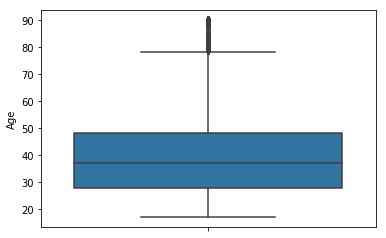

In [28]:
# Age 
sns.boxplot(y='Age', data=df_cp)
plt.show()

Let calculate 0-100th percentile to find a correct percentile value for removal of outliers

In [29]:
def ten_to_ten_percentiles(data, column):
    for i in range(0,100,10):
        var = data[column].values
        var = np.sort(var, axis=None)
        print('{} percentile value is {}'.format(i, var[int(len(var) * (float(i)/100))]))
    print('100 percentile value is {}'.format(var[-1]))

In [30]:
ten_to_ten_percentiles(df_cp, 'Age')

0 percentile value is 17
10 percentile value is 22
20 percentile value is 26
30 percentile value is 30
40 percentile value is 33
50 percentile value is 37
60 percentile value is 41
70 percentile value is 45
80 percentile value is 51
90 percentile value is 58
100 percentile value is 90


We could see from the boxplot of Age that there is no extreme value. Then after checking with percentile values, we have a confirmation of our remark. 

In [31]:
#calculating column values at each percntile 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100
def percentiles_from_90(data, column):
    for i in range(90,100):
        var = data[column].values
        var = np.sort(var, axis=None)
        print('{} percentile value is {}'.format(i, var[int(len(var) * (float(i)/100))]))
    print('100 percentile value is {}'.format(var[-1]))

Going deeper with the percentile values, we can have more information. So, here is a function that will give us the percentile values for each values from 99 to 100 percentile. 

In [32]:
#calculating colunm values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
def percentiles_from_99(data, column):
    for i in np.arange(0.0, 1.0, 0.1):
        var =data[column].values
        var = np.sort(var,axis = None)
        print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
    print("100 percentile value is ",var[-1])

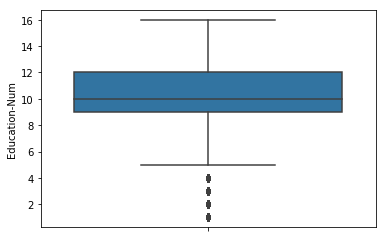

In [33]:
# Education-Num
sns.boxplot(y='Education-Num', data=df_cp)
plt.show()

In [34]:
ten_to_ten_percentiles(df_cp, 'Education-Num')

0 percentile value is 1
10 percentile value is 7
20 percentile value is 9
30 percentile value is 9
40 percentile value is 9
50 percentile value is 10
60 percentile value is 10
70 percentile value is 11
80 percentile value is 13
90 percentile value is 13
100 percentile value is 16


There is no anomalies with Education number. 

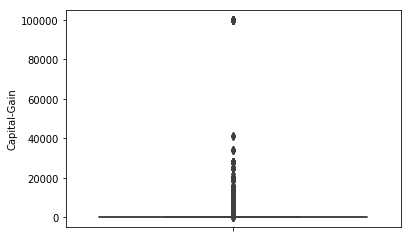

In [35]:
# Capital-Gain
sns.boxplot(y='Capital-Gain', data=df_cp)
plt.show()

In [36]:
ten_to_ten_percentiles(df_cp, 'Capital-Gain')

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 0
80 percentile value is 0
90 percentile value is 0
100 percentile value is 99999


In [37]:
percentiles_from_90(df_cp, 'Capital-Gain')

90 percentile value is 0
91 percentile value is 0
92 percentile value is 1151
93 percentile value is 2829
94 percentile value is 3674
95 percentile value is 5013
96 percentile value is 7298
97 percentile value is 7688
98 percentile value is 14084
99 percentile value is 15024
100 percentile value is 99999


In [38]:
percentiles_from_99(df_cp, 'Capital-Gain')

99.0 percentile value is 15024
99.1 percentile value is 15024
99.2 percentile value is 15831
99.3 percentile value is 20051
99.4 percentile value is 27828
99.5 percentile value is 41310
99.6 percentile value is 99999
99.7 percentile value is 99999
99.8 percentile value is 99999
99.9 percentile value is 99999
100 percentile value is  99999


In [39]:
# Removing the outliers based on 99.5th percentile of Capital-Gain
df_cp = df_cp[df_cp['Capital-Gain']<=34095]

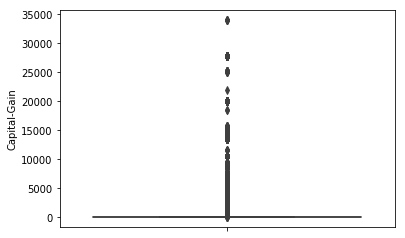

In [40]:
# Capital-Gain
sns.boxplot(y='Capital-Gain', data=df_cp)
plt.show()

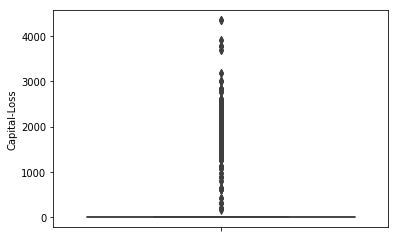

In [41]:
# Capital-Loss
sns.boxplot(y='Capital-Loss', data=df_cp)
plt.show()

In [42]:
ten_to_ten_percentiles(df_cp, 'Capital-Loss')

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 0
80 percentile value is 0
90 percentile value is 0
100 percentile value is 4356


In [43]:
percentiles_from_90(df_cp, 'Capital-Loss')

90 percentile value is 0
91 percentile value is 0
92 percentile value is 0
93 percentile value is 0
94 percentile value is 0
95 percentile value is 0
96 percentile value is 1590
97 percentile value is 1848
98 percentile value is 1902
99 percentile value is 2001
100 percentile value is 4356


In [44]:
percentiles_from_99(df_cp, 'Capital-Loss')

99.0 percentile value is 2001
99.1 percentile value is 2002
99.2 percentile value is 2051
99.3 percentile value is 2179
99.4 percentile value is 2231
99.5 percentile value is 2258
99.6 percentile value is 2377
99.7 percentile value is 2415
99.8 percentile value is 2415
99.9 percentile value is 2559
100 percentile value is  4356


No special extreme value here as we could notice for Capital-Gain. 

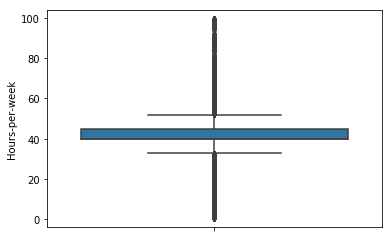

In [45]:
# Hours-per-week
sns.boxplot(y='Hours-per-week', data=df_cp)
plt.show()

In [46]:
ten_to_ten_percentiles(df_cp, 'Hours-per-week')

0 percentile value is 1
10 percentile value is 24
20 percentile value is 35
30 percentile value is 40
40 percentile value is 40
50 percentile value is 40
60 percentile value is 40
70 percentile value is 40
80 percentile value is 48
90 percentile value is 55
100 percentile value is 99


There is no special extreme value here. 

Now, we are going to create a helper function in order to remove all the outliers, based in our previous univariate analysis.  

In [47]:
def remove_outliers(data):
    a = data.shape[0]
    print("Number of salary records = {}".format(a))
        
    temp_data = data[data['Capital-Gain']<=34095]
    b = temp_data.shape[0]
    
    print('Number of outliers from the Capital-Gain column= {}'.format(a - b))
        
    data = data[(data['Capital-Gain']<=34095)]
    
    print('Total outlies removed = {}'.format(a-b))
    print('-----'*10)
    return data

In [48]:
print('Removing all the outliers from the data')
print('-----'*10)
df_no_outliers = remove_outliers(df)

proportion_remaing_data = float(len(df_no_outliers)) / len(df)
print('Proportion of observation that remain after removing outliers = {}'.format(proportion_remaing_data))

Removing all the outliers from the data
--------------------------------------------------
Number of salary records = 48842
Number of outliers from the Capital-Gain column= 247
Total outlies removed = 247
--------------------------------------------------
Proportion of observation that remain after removing outliers = 0.9949428770320625


After removing the outliers from out data, still 99.49% of the dataset remain present. 

## 4- Exploratory Data Analysis   

First thing first! 
Let's take a look at the number of people who make more that 50K and those who don't

In [49]:
df_no_outliers.Income.unique()

array(['<=50K', '>50K'], dtype=object)

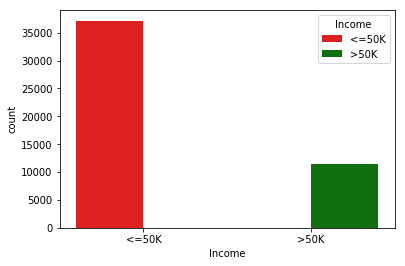

In [50]:
palette = {"<=50K":"r", ">50K":"g"}
sns.countplot(x="Income", data=df_no_outliers, hue="Income", palette=palette)

We can notice that we have 24720 adults who make less than 50K dollars and only 7841 of them make more than 50K dollars. So,only 24% of adult make more than 50K dollars.

#### A- Numerical Data   
For this part, we will be performing centrality measure (mean, median) and dispersion measures (range, percentiles, variance, standard deviation).  
All those information can be found with pandas **describe()** function.  

In [51]:
df_no_outliers.describe()

,Age,fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-per-week
count,48595.000000,4.859500e+04,48595.000000,48595.000000,48595.000000,48595.000000
mean,38.603375,1.896813e+05,10.063422,579.897829,87.947073,40.371026
std,13.712317,1.056323e+05,2.562615,2516.463352,403.979066,12.367802
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782070e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377130e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,34095.000000,4356.000000,99.000000


From this result, we can see that our features are in different scales, so that information will be useful for feature engineering step. For simple visualization purpose, we can plot the probability density of all those features. 

##### A.1- Univariate Analysis 

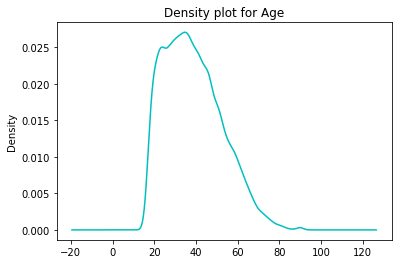

In [52]:
# Age  
df_no_outliers.Age.plot(kind='kde', title='Density plot for Age', color='c')

Here, we have a positive skewed distribution for Age feature. 

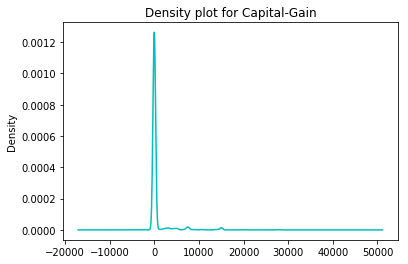

In [53]:
# Capital-Gain  
df_no_outliers['Capital-Gain'].plot(kind='kde', title='Density plot for Capital-Gain', color='c')

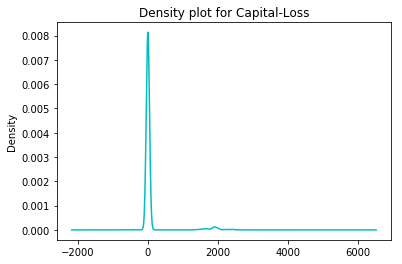

In [54]:
# Capital-Loss  
df_no_outliers['Capital-Loss'].plot(kind='kde', title='Density plot for Capital-Loss', color='c')

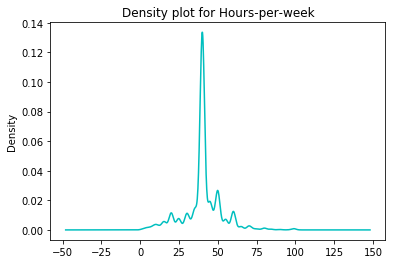

In [55]:
# Capital-Loss  
df_no_outliers['Hours-per-week'].plot(kind='kde', title='Density plot for Hours-per-week', color='c')

We need to deal with the problem of distribution for all our numerical data values in the feature engineering part. 

##### A.2- Bivariate analysis  
We will try to determine the correlation between some numerical data.

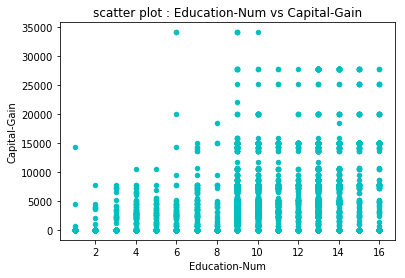

In [56]:
# Capital-Gain and Education-Num 
# use scatter plot for bi-variate distribution
df_no_outliers.plot.scatter(x='Education-Num', y='Capital-Gain', color='c', title='scatter plot : Education-Num vs Capital-Gain');

We have a positive relationship between the number of year of education and the Capital Gain. The more educated you are, your are likely to have more capital. 

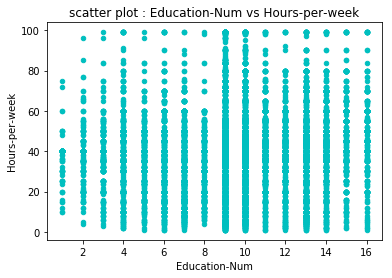

In [57]:
# Hours-per-week and Education-Num 
# use scatter plot for bi-variate distribution
df_no_outliers.plot.scatter(x='Education-Num', y='Hours-per-week', color='c', title='scatter plot : Education-Num vs Hours-per-week');

There is no interesting pattern. 

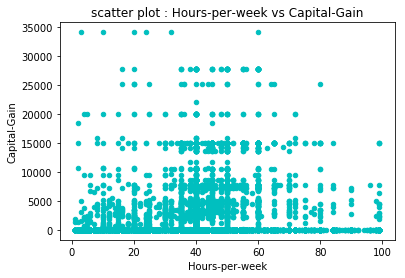

In [58]:
# Capital-Gain and Hours-per-week
# use scatter plot for bi-variate distribution
df_no_outliers.plot.scatter(x='Hours-per-week', y='Capital-Gain', color='c', title='scatter plot : Hours-per-week vs Capital-Gain');

We can not identify any interesting pattern from this visualization. 

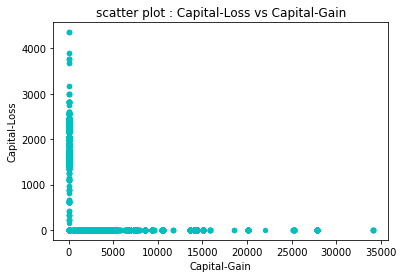

In [59]:
# Capital-Gain and Capital-Loss
# use scatter plot for bi-variate distribution
df_no_outliers.plot.scatter(x='Capital-Gain', y='Capital-Loss', color='c', title='scatter plot : Capital-Loss vs Capital-Gain');

People without any capital Gain lose a lot of money, which is obvious, because without any capital Gain, you would need to borrow with interest, and then keep **"surviving".** 

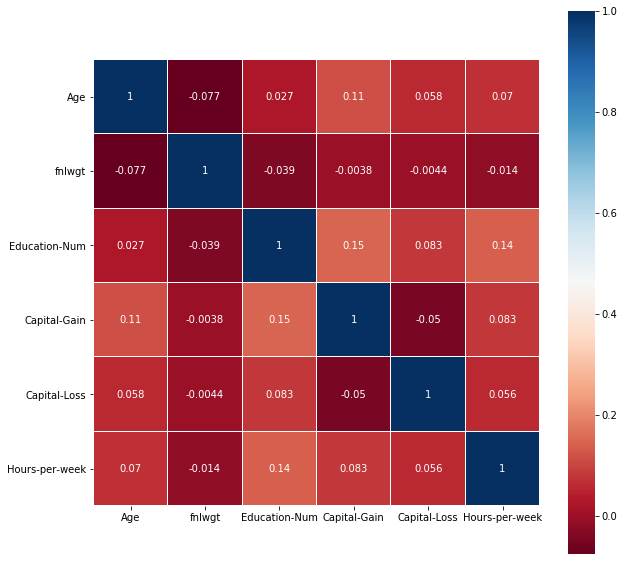

In [60]:
numerical_cols = ['int64']  
plt.figure(figsize=(10, 10))
sns.heatmap( 
            df_no_outliers.select_dtypes(include=numerical_cols).corr(),
            cmap=plt.cm.RdBu, 
            vmax=1.0,
            linewidths=0.1,
            linecolor='white', 
            square=True,
            annot=True
)

From the correlation matrix, we can see that the level of relationship is very low between the numerical features.  


#### B- Categorical Data

There are many explorations we can do in order to have a better understanding of the data.   
Here are some possibilities we could have:  
* B.1- Income VS Occupation for countries in each continent
* B.2- Income VS Workclass for countries in each continent
* B.3- Income VS Marital Status for countries in each continent
* B.4- Mean Capital Gain VS Martial Status for each continent


In [61]:
df_no_outliers.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We have many countries from different continent. For better visualization, it might be interesting to create a new column **Continent** in order to easily group information per continent and the corresponding countries. 

In [62]:
df_no_outliers['Country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

There is country name called **South** which is definitly an error. It could be considered as **continent**, then we could associate in with the corresponding continent. But, here is the problem: we have both **South-America**, **South-Asia** that could be possible values. In order to avoid including more errors in our data, it might be better to remove the corresponding observations in case that action does not lead to loosing too much data.  

In [63]:
south_df = df_no_outliers[df_no_outliers['Country']=='South']
a = south_df.shape[0]
b = df_no_outliers.shape[0]

print('{} rows corresponds to South, which represents {}% of the data'.format(a, (1.0*a/b)*100))

113 rows corresponds to South, which represents 0.2325342113386151% of the data


We can remove all the corresponding rows for **Country == South** because, it corresponds to only 0.244% of the original dataset. 

In [64]:
south_index = south_df.index 
df_no_outliers.drop(south_index, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


We are going to perform the following preprocessing:  
* Outlying-US(Guam-USVI-etc) ==> Outlying-US   
* Trinadad&Tobago ==> Trinadad-Tobago  
* Hong ==> Hong-Kong

In [65]:
# Changing the corresponding values.
df_no_outliers.loc[df_no_outliers['Country']=='Outlying-US(Guam-USVI-etc)', 'Country'] = 'Outlying-US'
df_no_outliers.loc[df_no_outliers['Country']=='Trinadad&Tobago', 'Country'] = 'Trinadad-Tobago'
df_no_outliers.loc[df_no_outliers['Country']=='Hong', 'Country'] = 'Hong-Kong'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [66]:
# Check if the process worked
df_no_outliers['Country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US', 'Scotland',
       'Trinadad-Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong-Kong',
       'Ireland', 'Hungary', 'Holand-Netherlands'], dtype=object)

We can clearly see that the changes have been made. 

In [67]:
asia = ['India', 'Iran', 'Philippines', 'Cambodia', 'Thailand', 'Laos', 'Taiwan', 
       'China', 'Japan', 'Vietnam', 'Hong-Kong']  

america = ['United-States', 'Cuba', 'Jamaica', 'Mexico', 'Puerto-Rico', 'Honduras', 
           'Canada', 'Columbia', 'Ecuador', 'Haiti', 'Dominican-Republic', 
           'El-Salvador', 'Guatemala', 'Peru', 'Outlying-US', 'Trinadad-Tobago', 
           'Nicaragua', '']  

europe = ['England', 'Germany', 'Italy', 'Poland', 'Portugal', 'France', 'Yugoslavia', 
          'Scotland', 'Greece', 'Ireland', 'Hungary', 'Holand-Netherlands'] 

In [68]:
# Now, create a dictionary to map each country to a Corresponding continent. 
continents = {country: 'Asia' for country in asia}
continents.update({country: 'America' for country in america})
continents.update({country: 'Europe' for country in europe})

In [69]:
# Then use Pandas map function to map continents to countries  
df_no_outliers['Continent'] = df_no_outliers['Country'].map(continents)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Here, we have the continents corresponding to all the existing contries in our dataset.

In [70]:
df_no_outliers['Continent'].unique()

array(['America', 'Asia', 'Europe'], dtype=object)

## B.1- Income VS Occupation for countries in each continent  
I created a helper fonction in order to preprocess for each country in one shot. 

In [71]:
def Occupation_VS_Income(continent):
    choice = df_no_outliers[df_no_outliers['Continent']==continent] 
    countries = list(choice['Country'].unique())

    for country in countries:
        pd.crosstab(choice[choice['Country']==country].Occupation, choice[choice['Country']==country].Income).plot(kind='bar', 
                                                                                                                       title='Income VS Occupation in {}'.format(country))

### B.1.1- For Asia

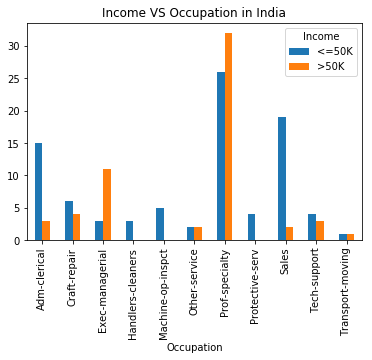

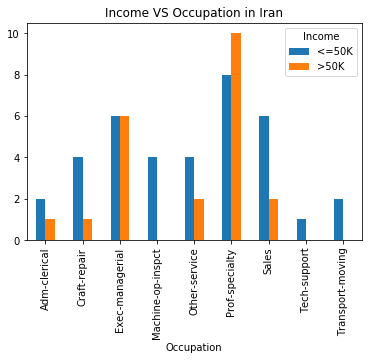

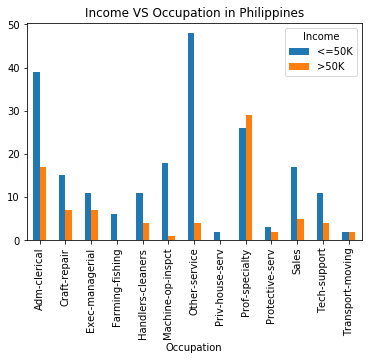

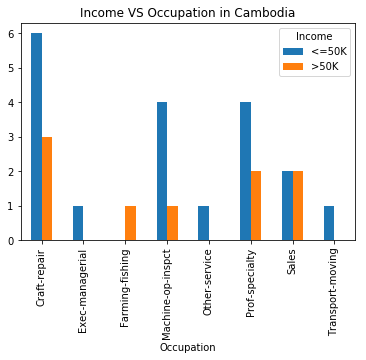

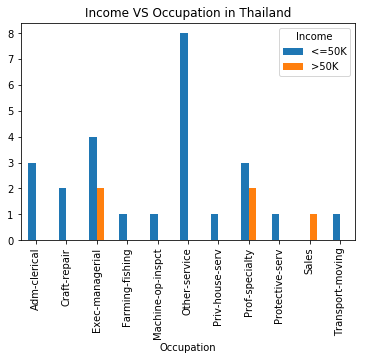

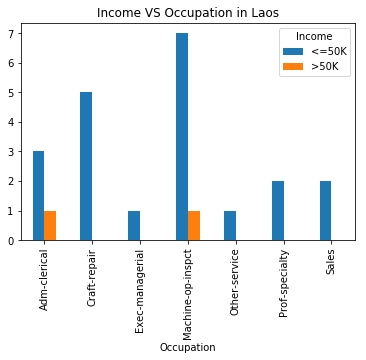

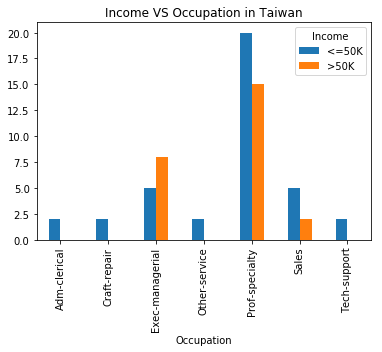

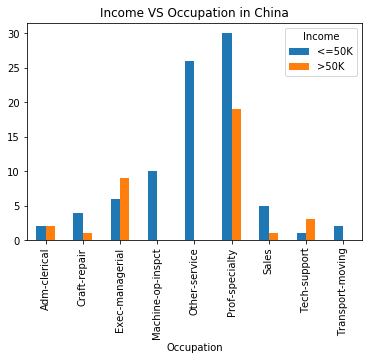

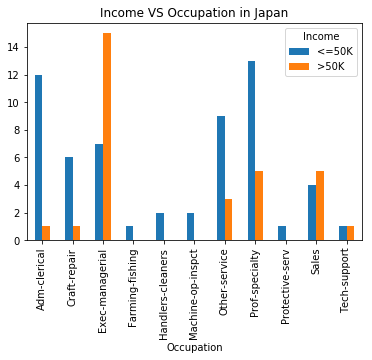

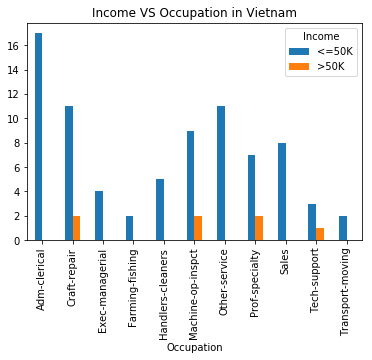

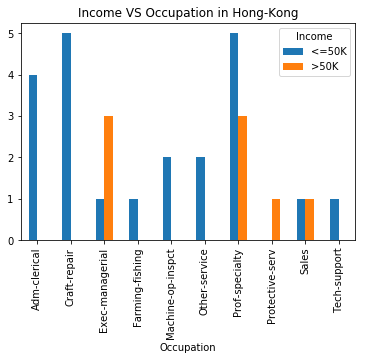

In [72]:
Occupation_VS_Income('Asia')

### B.1.2- For America

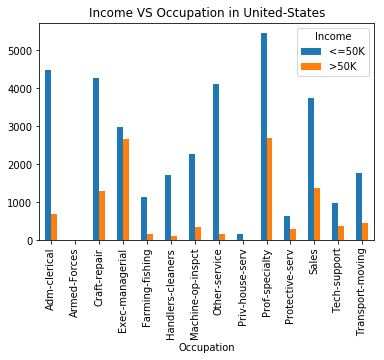

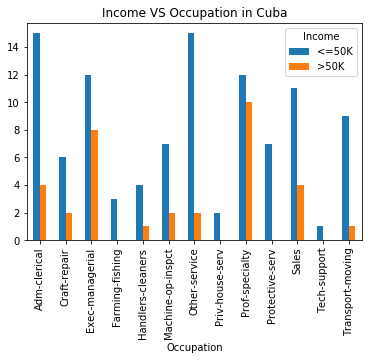

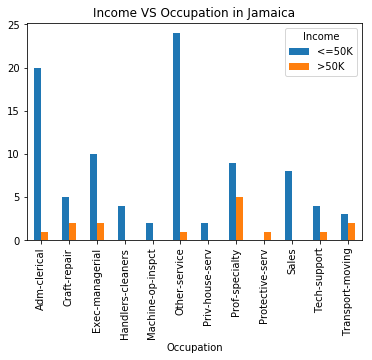

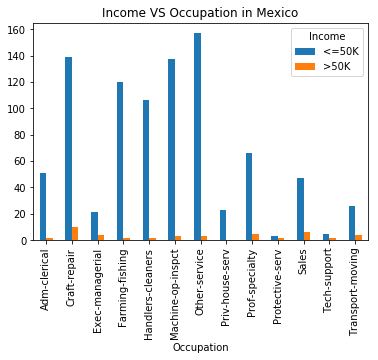

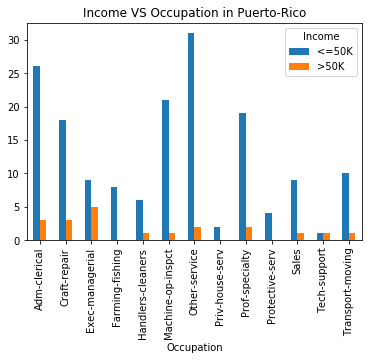

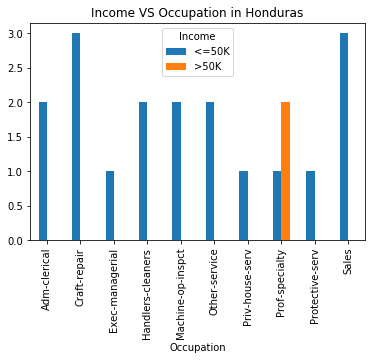

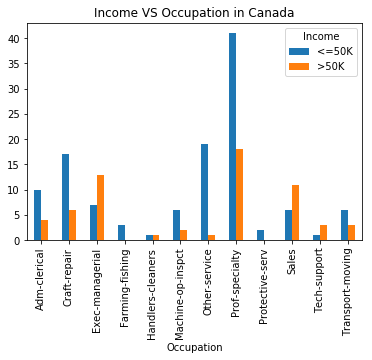

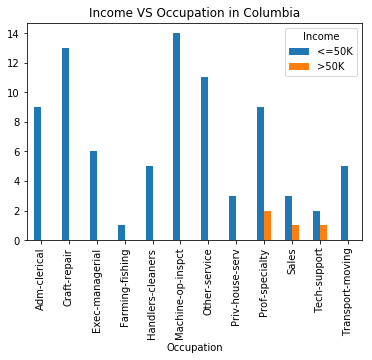

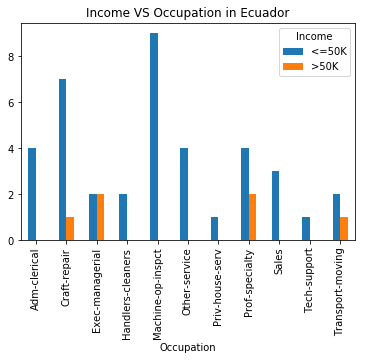

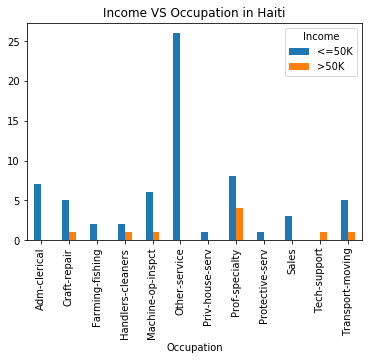

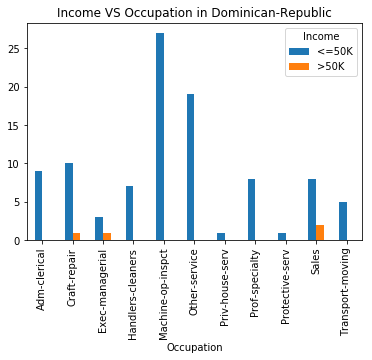

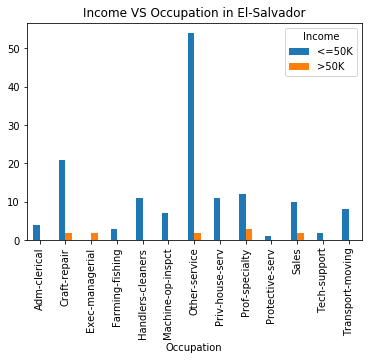

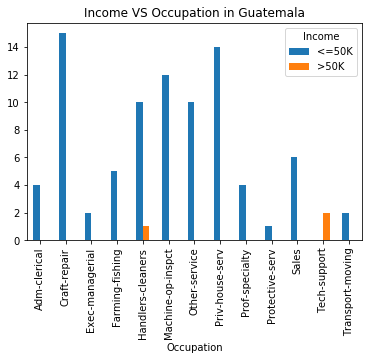

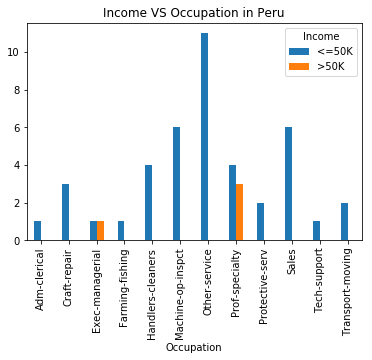

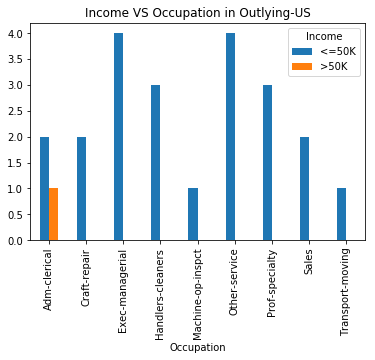

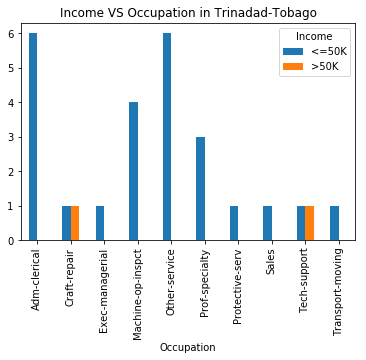

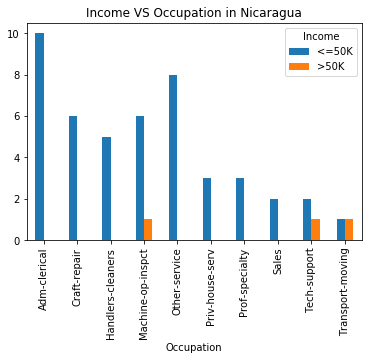

In [73]:
Occupation_VS_Income('America')

### B.1.3- For Europe

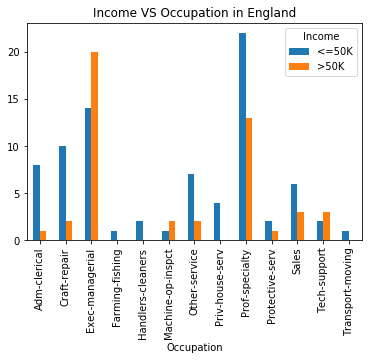

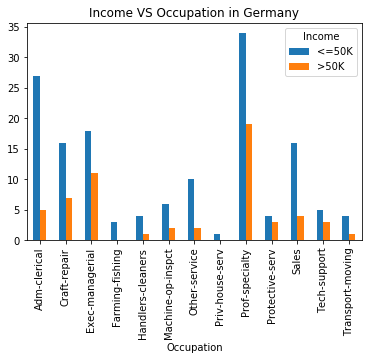

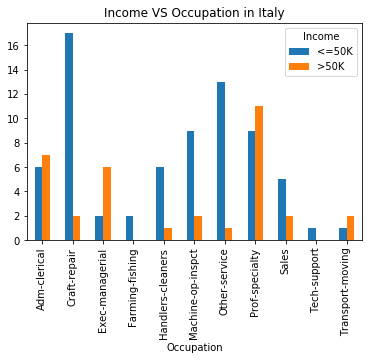

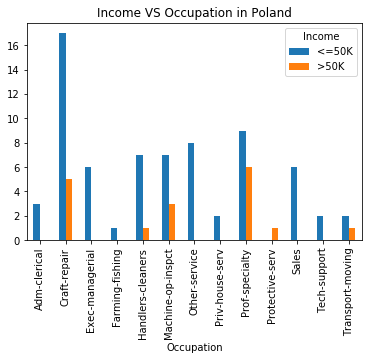

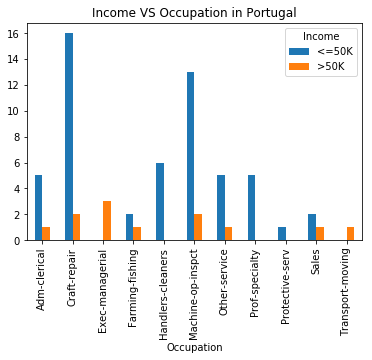

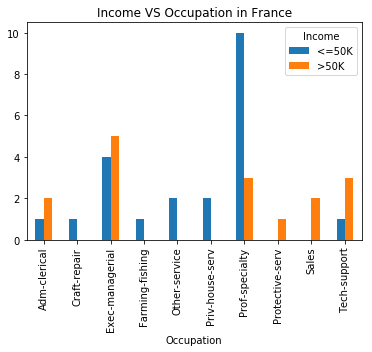

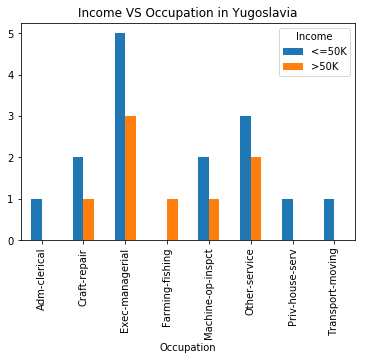

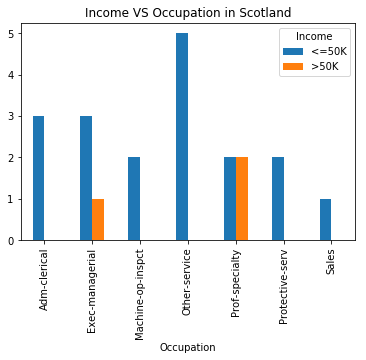

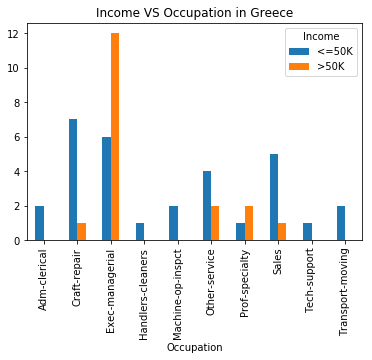

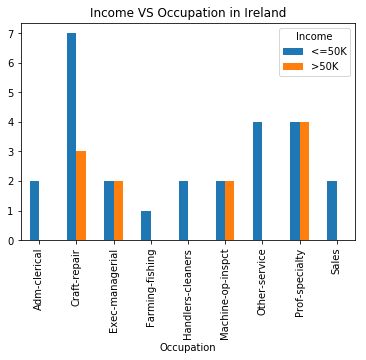

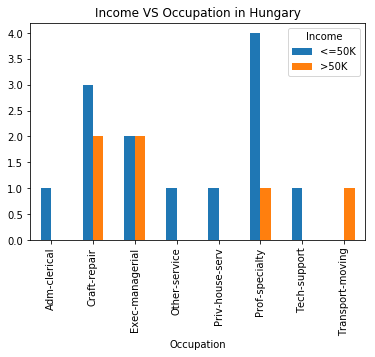

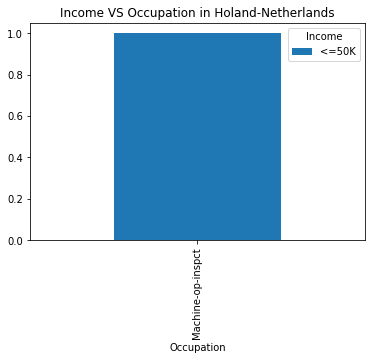

In [74]:
Occupation_VS_Income('Europe')

## B.2- Income VS Workclass for countries in each continent  

In [75]:
def Workclass_VS_Income(continent):
    choice = df_no_outliers[df_no_outliers['Continent']==continent] 
    countries = list(choice['Country'].unique())

    for country in countries:
        pd.crosstab(choice[choice['Country']==country].Workclass, choice[choice['Country']==country].Income).plot(kind='bar', 
                                                                                                                       title='Income VS Workclass in {}'.format(country))

### B.2.1- For Asia

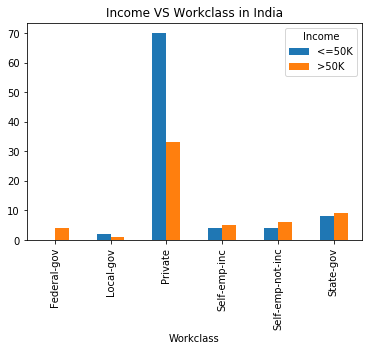

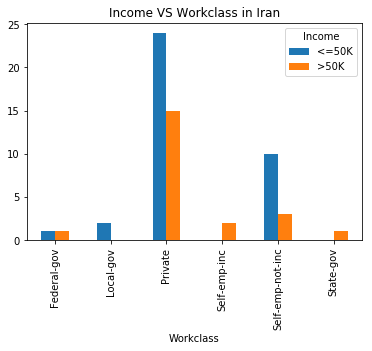

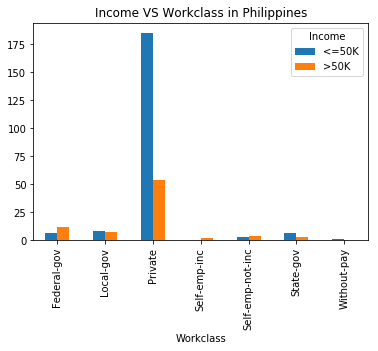

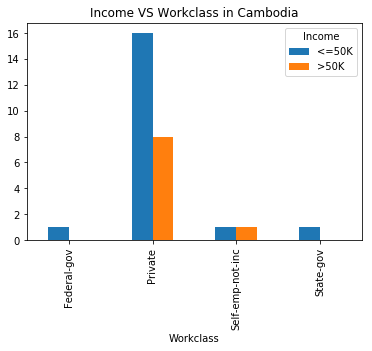

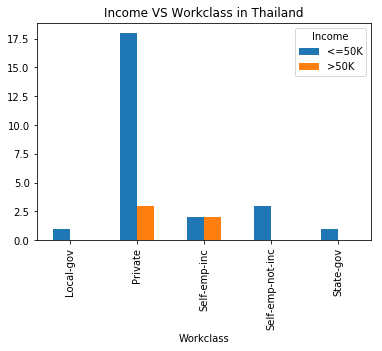

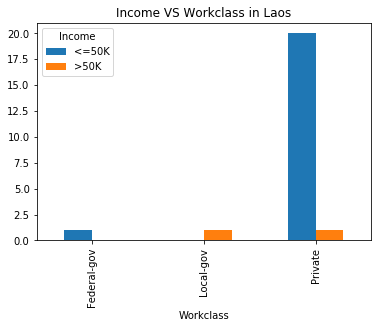

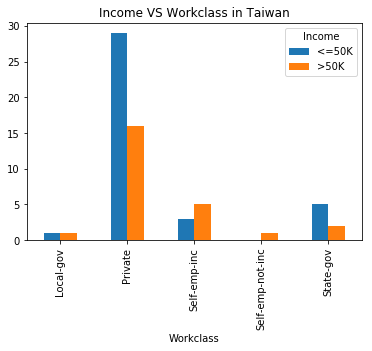

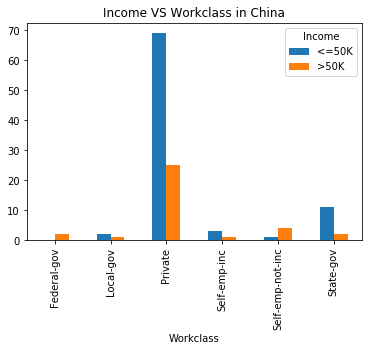

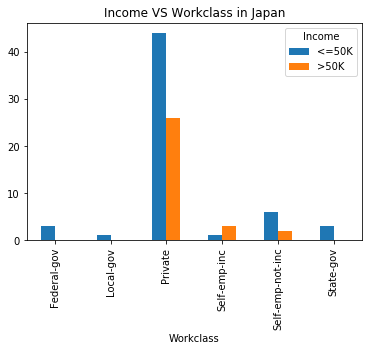

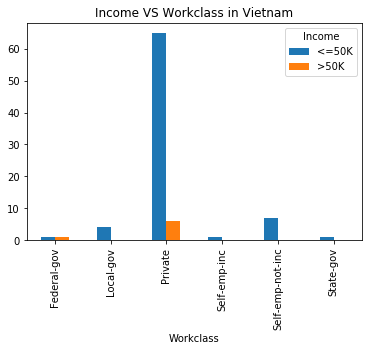

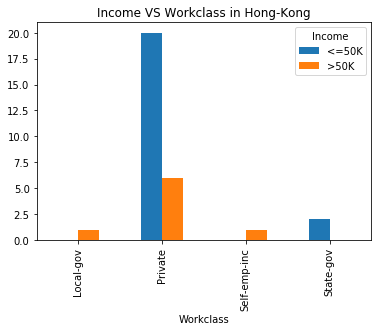

In [76]:
Workclass_VS_Income('Asia')

### B.2.2- For America

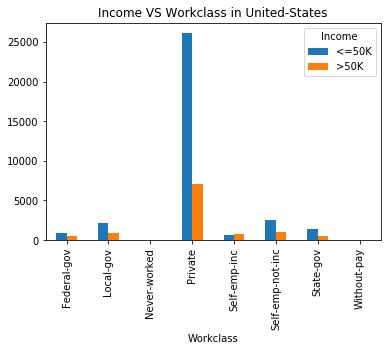

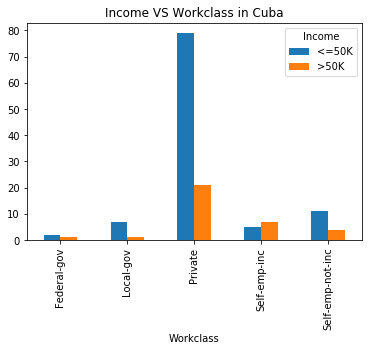

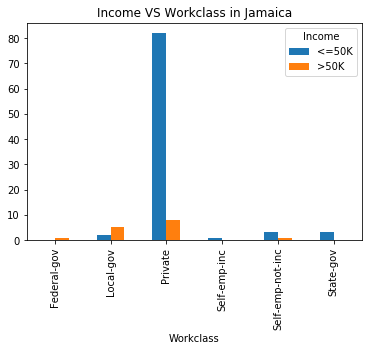

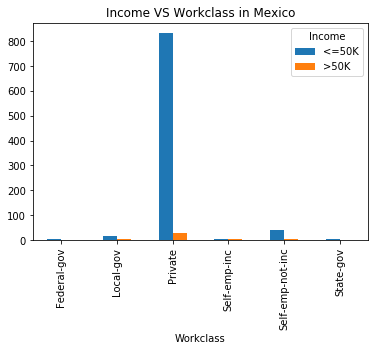

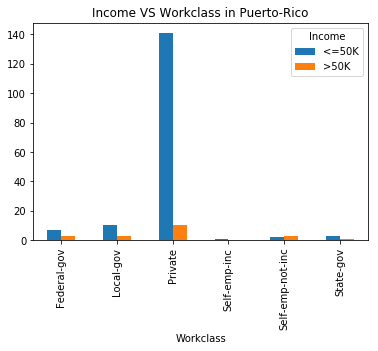

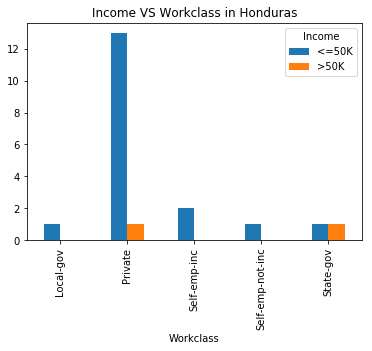

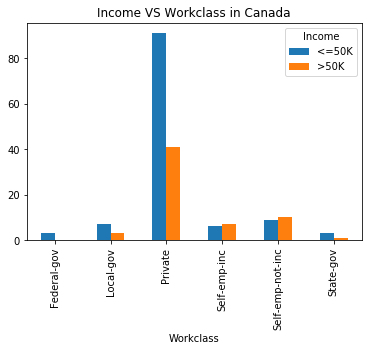

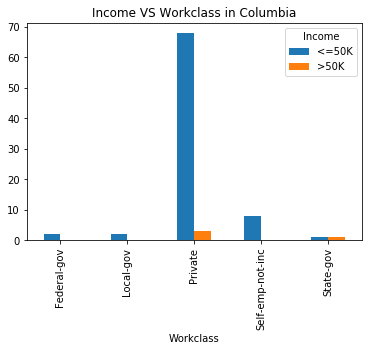

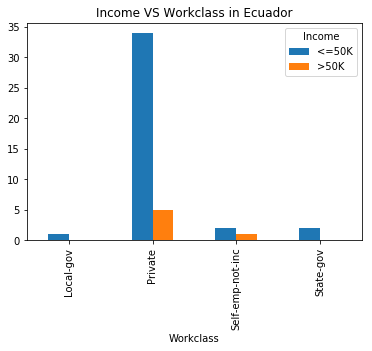

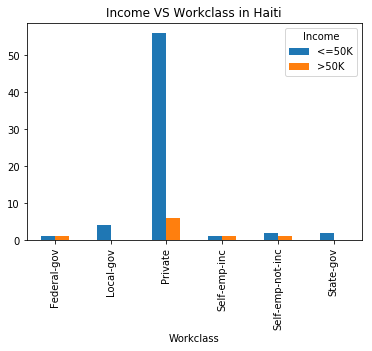

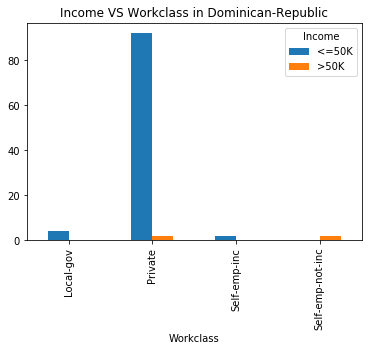

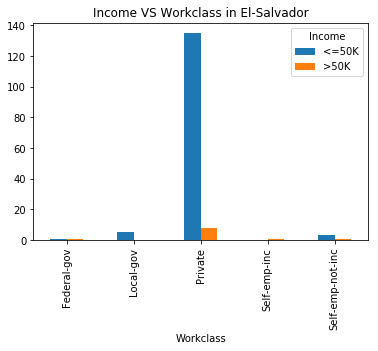

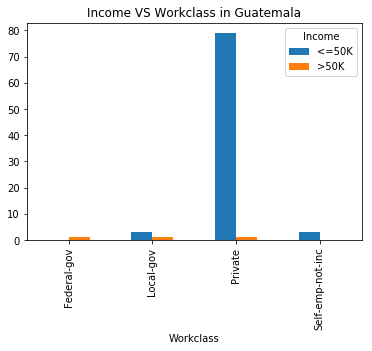

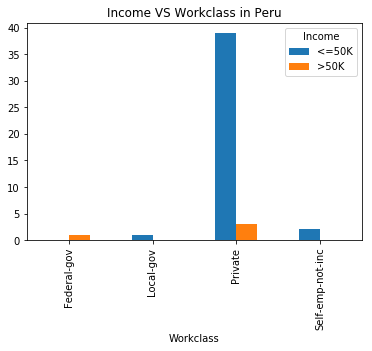

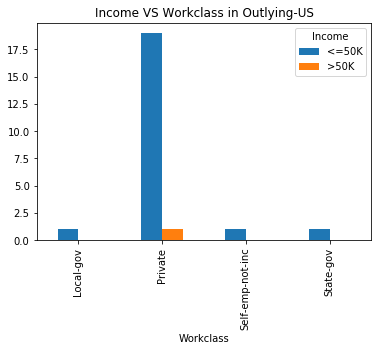

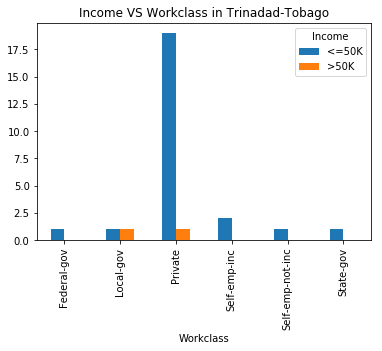

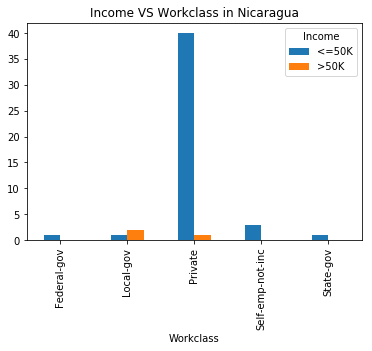

In [77]:
Workclass_VS_Income('America')

### B.2.3- For Europe

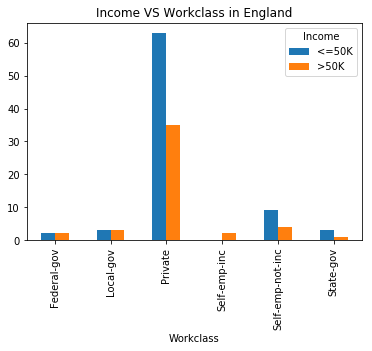

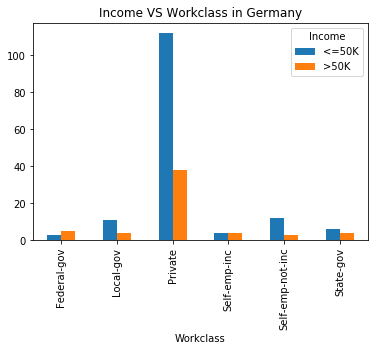

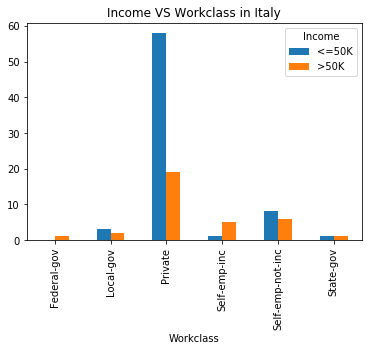

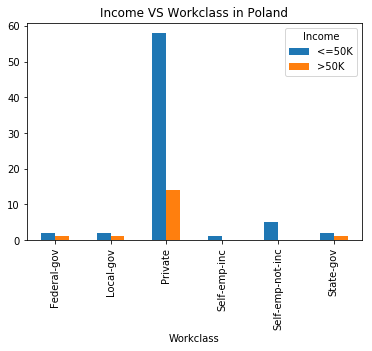

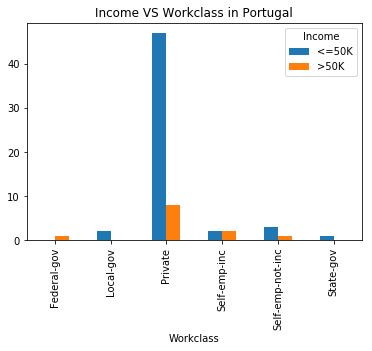

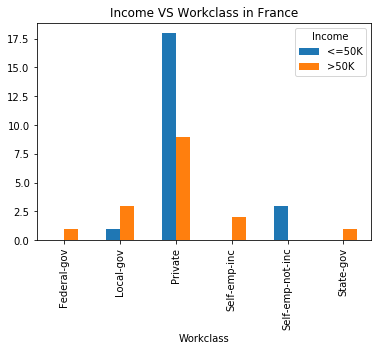

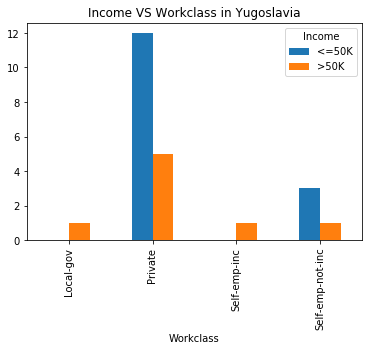

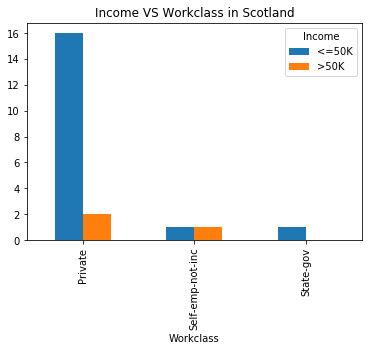

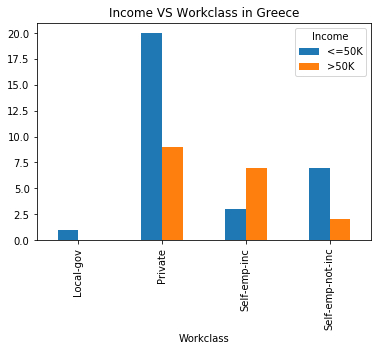

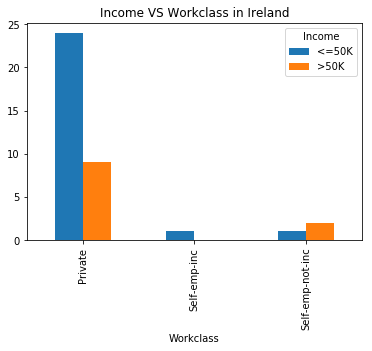

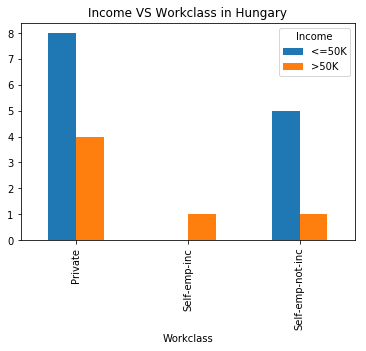

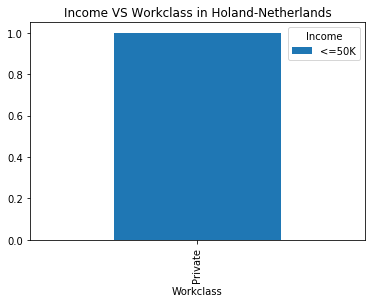

In [78]:
Workclass_VS_Income('Europe')

## B.3- Income VS Marital Status for countries in each continent  

In [79]:
def MaritalStatus_VS_Income(continent):
    choice = df_no_outliers[df_no_outliers['Continent']==continent] 
    countries = list(choice['Country'].unique())

    for country in countries:
        pd.crosstab(choice[choice['Country']==country]['Martial Status'], choice[choice['Country']==country].Income).plot(kind='bar', 
                                                                                                                       title='Income VS Workclass in {}'.format(country))

### B.3.1- For Asia

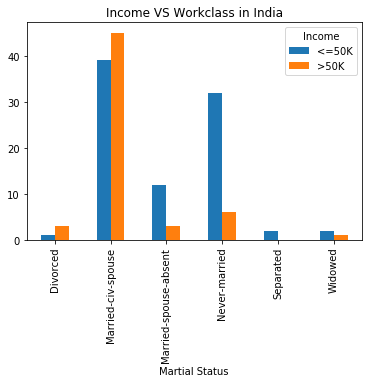

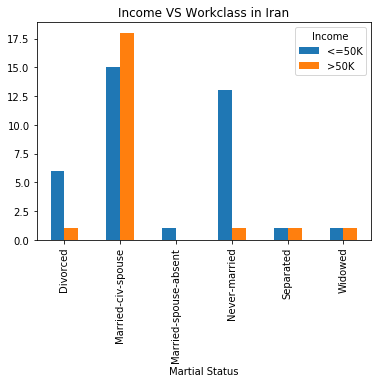

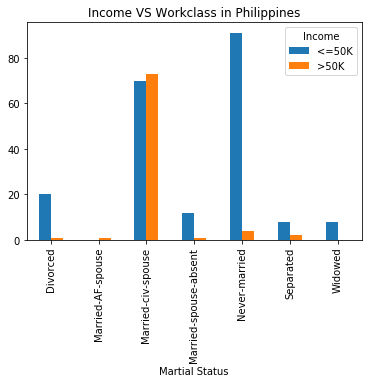

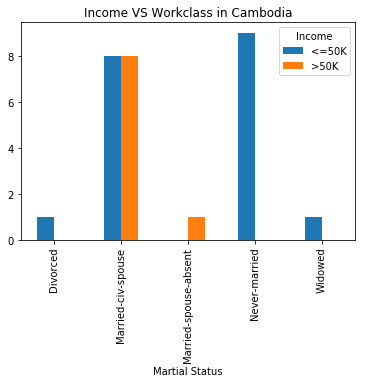

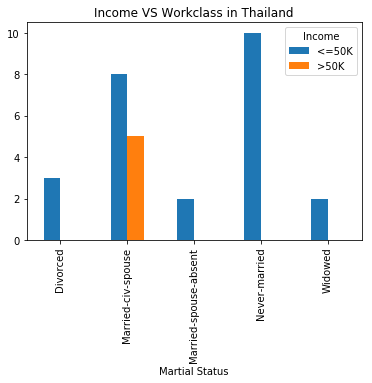

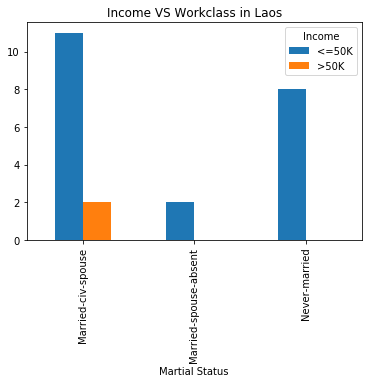

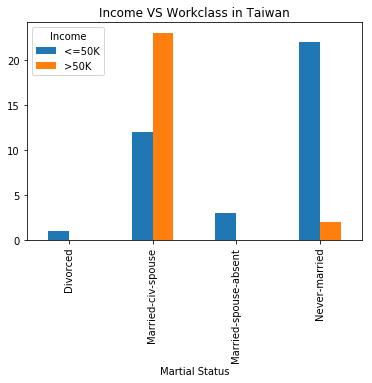

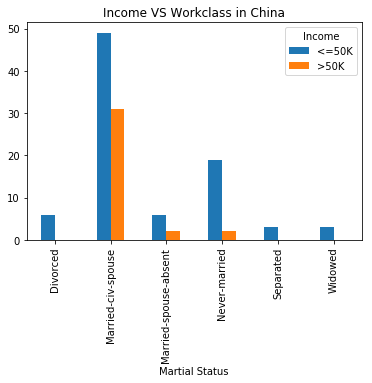

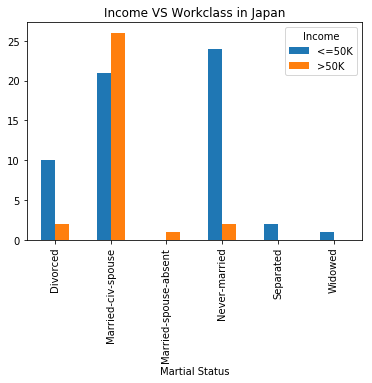

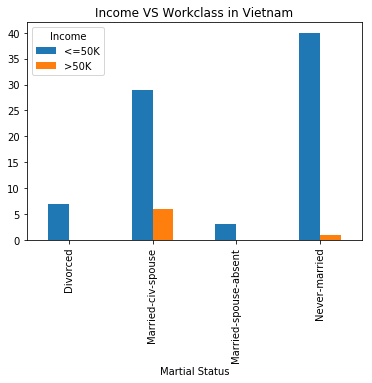

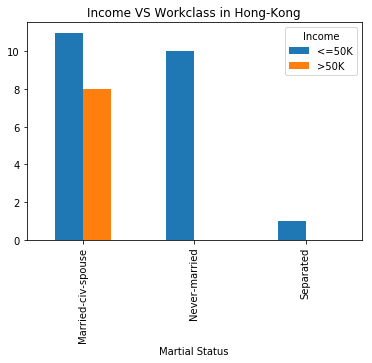

In [80]:
MaritalStatus_VS_Income('Asia')

## B.4- Mean Capital Gain VS Martial Status for each continent

To accomplish this task; I will create a new dataframe containing the grouping result of Continent, Contient, Marital Status and the **mean value of Capital Gain**

In [81]:
# reset_index(): to convert to aggregation result to a pandas dataframe.
agg_df = df_no_outliers.groupby(['Continent','Country', 'Martial Status'])['Capital-Gain'].mean().reset_index()

In [82]:
agg_df['Mean_Capital_Gain'] = agg_df['Capital-Gain']
agg_df.drop('Capital-Gain', axis=1, inplace=True)

In [83]:
agg_df.head()

,Continent,Country,Martial Status,Mean_Capital_Gain
0,America,Canada,Divorced,0.000000
1,America,Canada,Married-civ-spouse,1338.698925
2,America,Canada,Married-spouse-absent,0.000000
3,America,Canada,Never-married,0.000000
4,America,Canada,Separated,0.000000


In [84]:
import seaborn as sns

In [85]:
def Mean_TotCapital_VS_Marital_Status(continent):
    choice = agg_df[agg_df['Continent']==continent] 
    countries = list(choice['Country'].unique())

    for country in countries:
        df_c = choice[choice['Country']==country]
        ax = sns.catplot(x='Martial Status', y='Mean_Capital_Gain', 
                         kind='bar', data=df_c)

        ax.fig.suptitle('Country: {}'.format(country))
        ax.fig.autofmt_xdate()

### B.4.1- For Asia

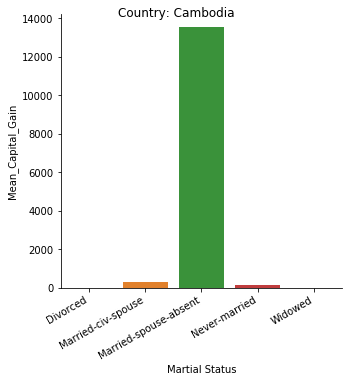

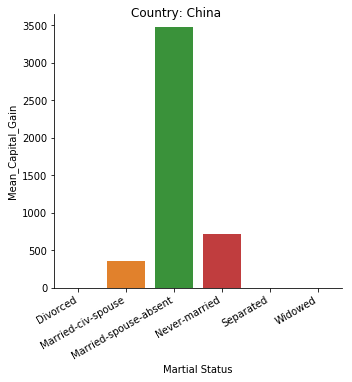

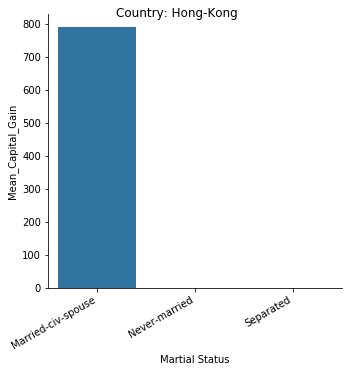

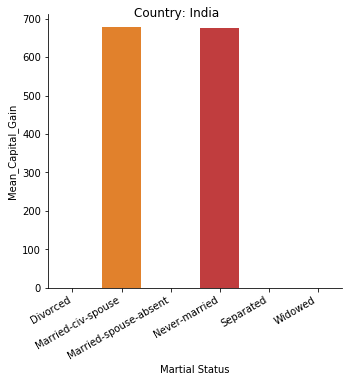

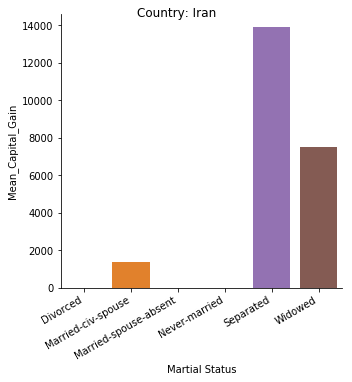

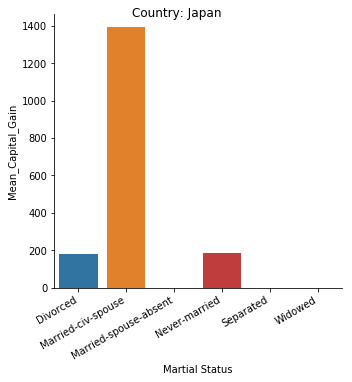

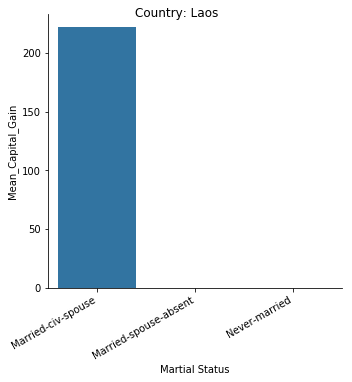

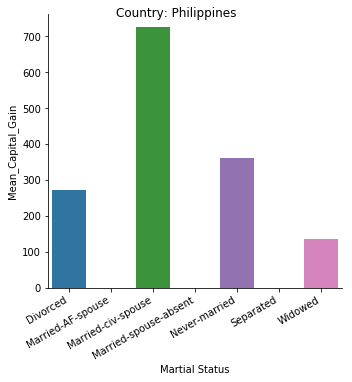

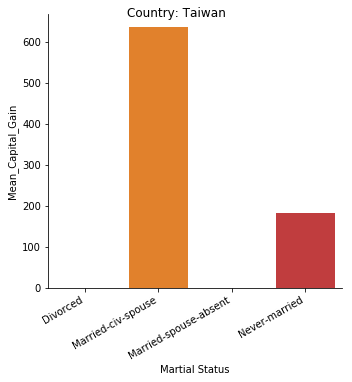

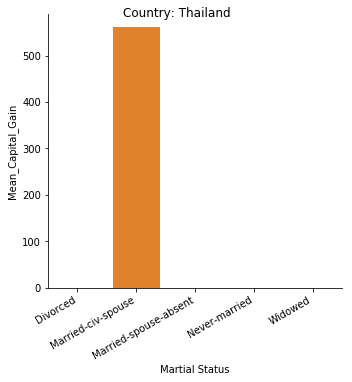

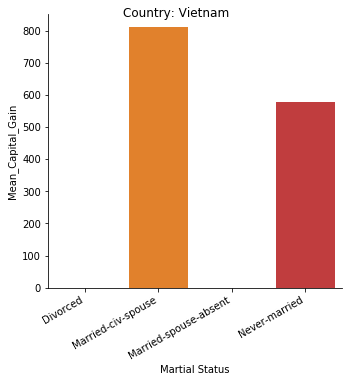

In [86]:
Mean_TotCapital_VS_Marital_Status('Asia')

### B.4.2- For America

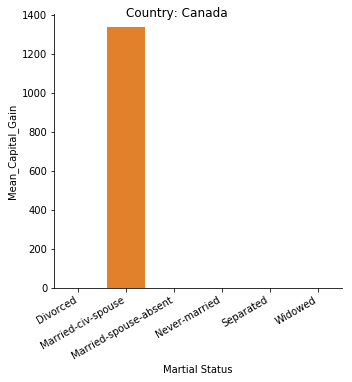

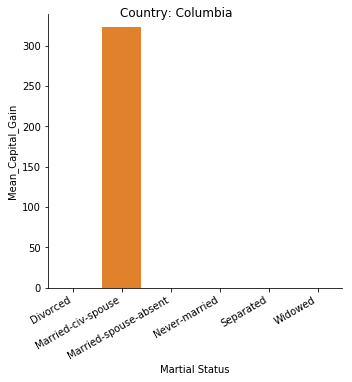

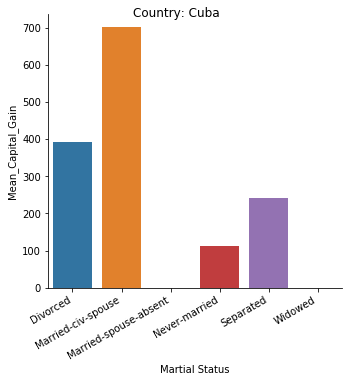

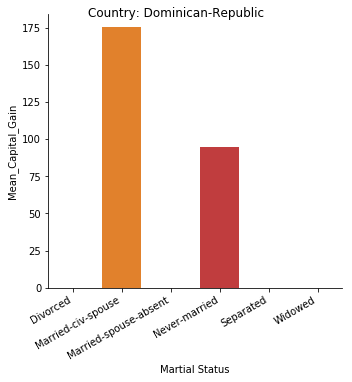

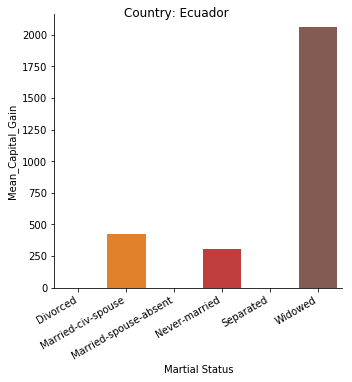

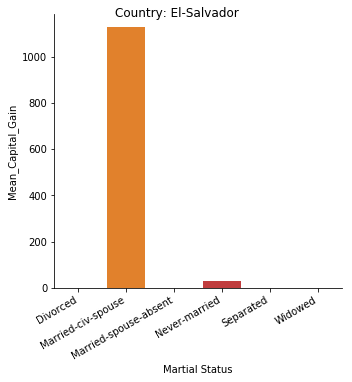

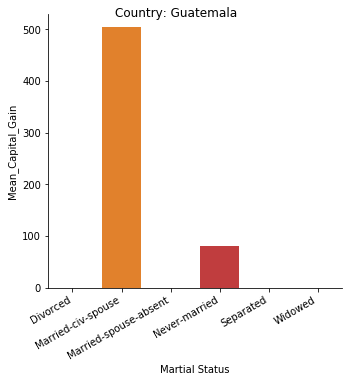

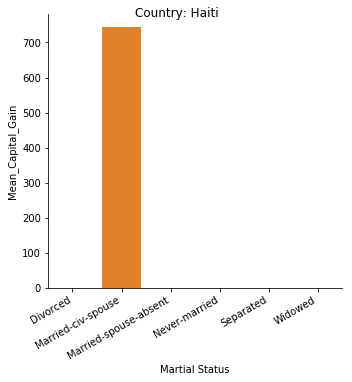

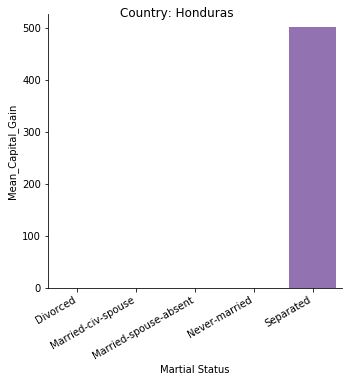

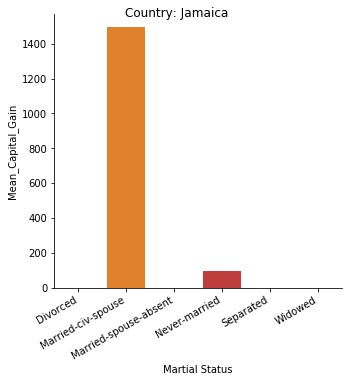

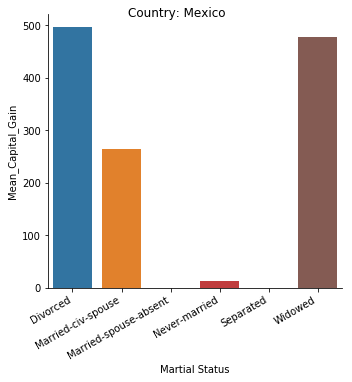

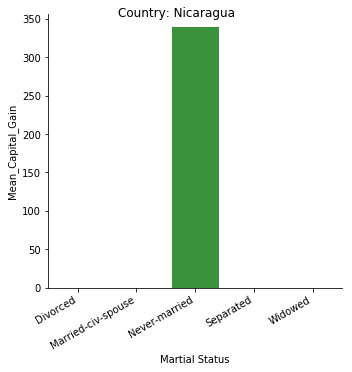

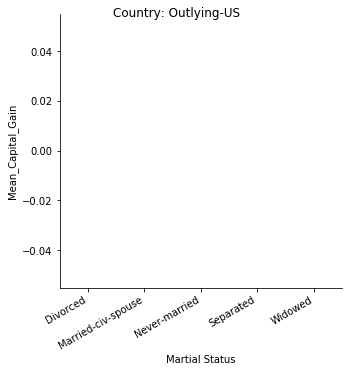

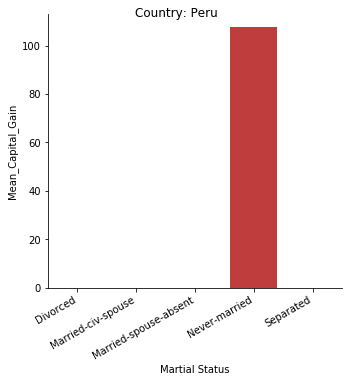

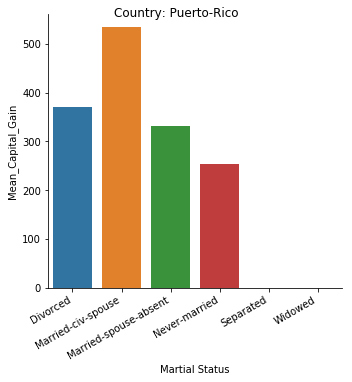

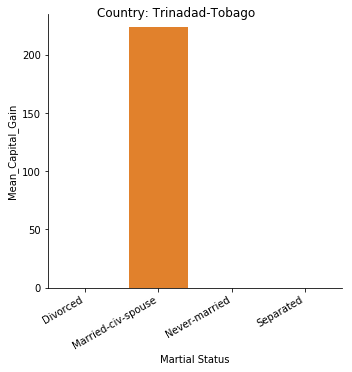

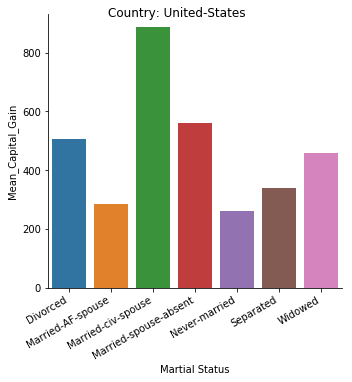

In [87]:
Mean_TotCapital_VS_Marital_Status('America')

### B.4.3- For Europe

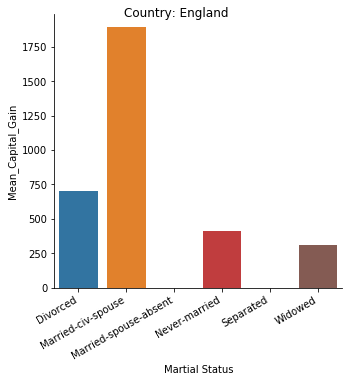

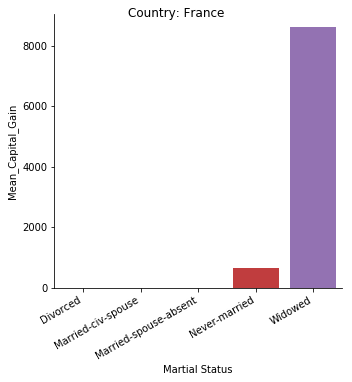

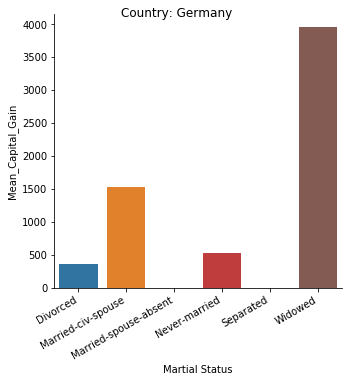

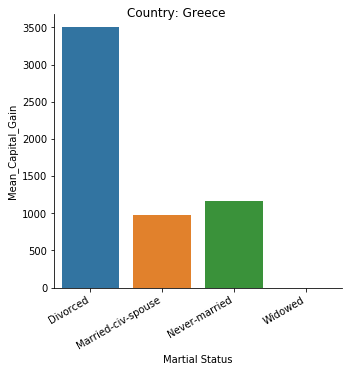

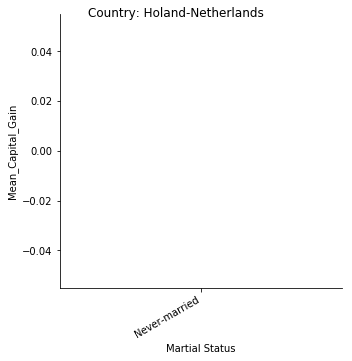

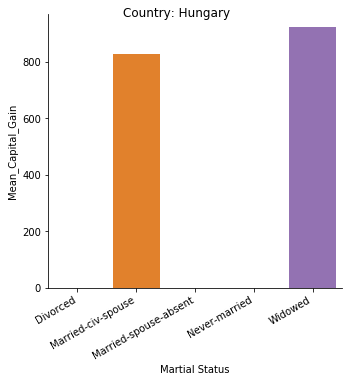

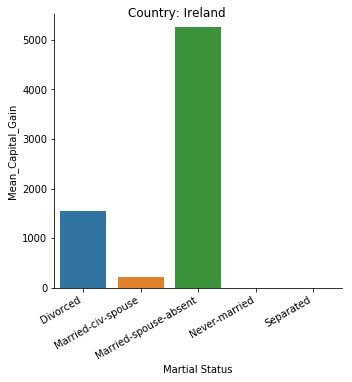

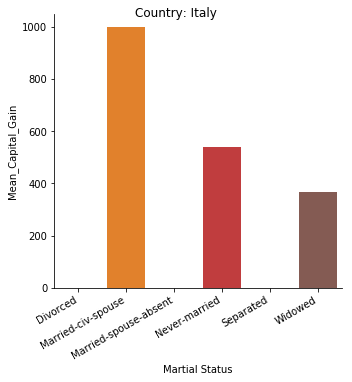

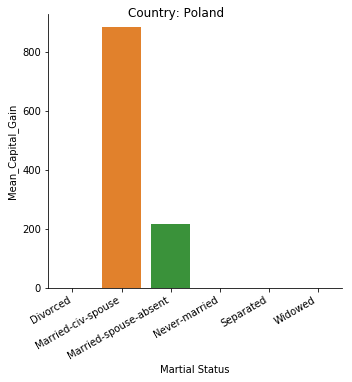

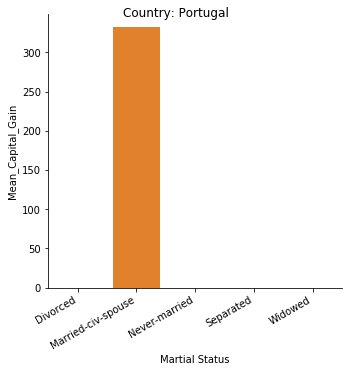

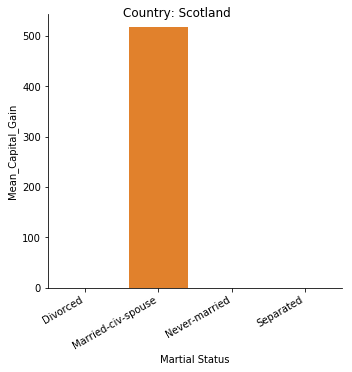

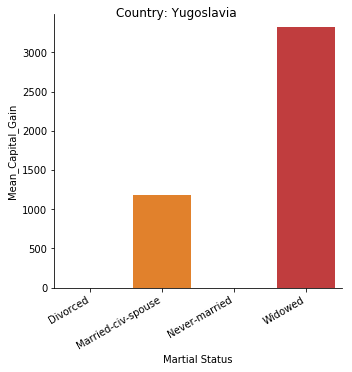

In [88]:
Mean_TotCapital_VS_Marital_Status('Europe')

## 5- Feature Engineering   
This is one of the most crucial aspect for a Data Science project. It is a process of transforming the raw data to better representative 
features in order to create better predictive models. 

#### A- Derived Features   
Sometimes, it is important to perform some transformations on the features/columns in order to reduce the number of original data columns. 
Let's start looking at our columns.

##### A.1- Education and Education-Num  

In [89]:
edu = df_no_outliers.Education.unique()
eduNum = df_no_outliers['Education-Num'].unique()
print('Education: \nTotal category:{}\nValues: {}\n'.format(len(edu),list(edu)))
print('Education Num: \nTotal Education-Num:{}\nValues: {}'.format(len(eduNum),
                                                                  list(eduNum)))

Education: 
Total category:16
Values: ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']

Education Num: 
Total Education-Num:16
Values: [13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6, 2, 1, 8]


We can see that The **Education-Num** seems to be the numerical representation of **Education**, and also the same Total number (16). To do so, we will need only one of them, not both columns.  
Let's check some observations (rows) to verify our hypothesis if there is a corrrespondance between **Education-Num** and **Education**.   
Then we can simply visualize the two columns in order to check the correspondance between them.  

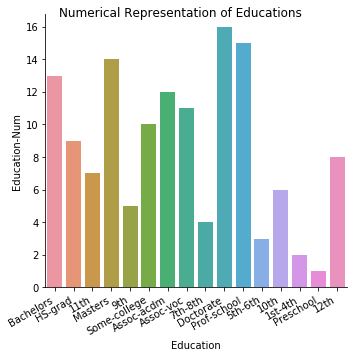

In [90]:
ax = sns.catplot(x='Education', y='Education-Num', kind='bar', data=df_no_outliers)
ax.fig.suptitle('Numerical Representation of Educations')
ax.fig.autofmt_xdate()

From the previous plot, we can see that 
* Bachelor <==> 13  
* HS-grad <==> 9
* 7th-8th <==> 4   
* 9th <==> 5    
* Preschool <==> 1 
* etc.  
Based on those information, we will need only one column to represent the **level of education**, and in our case,   
we will choose **Education-Num** (remove **Education** column) which corresponds to the numerical representation.  

In [91]:
# Finally remove the Education column  
df_no_outliers.drop('Education', axis=1, inplace=True)

##### A.2- Capital-Loss and Capital-Gain  
From those two features, we can create a new column called **Capital-State** that will be the difference between Capital-Gain and Capital-Loss.  
Then we will remove those two features.  

In [92]:
df_no_outliers['Capital-State'] = df_no_outliers['Capital-Gain'] - df_no_outliers['Capital-Loss']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
# Then remove Capital-Gain and Capital-Loss. 
df_no_outliers.drop(['Capital-Gain', 'Capital-Loss'], axis=1, inplace=True)

In [94]:
'''
Let not forget to drop the 'Continent' column we added for 
visualization purpose. 
'''
df_no_outliers.drop('Continent', axis=1, inplace=True)

In [95]:
df_no_outliers.head(3)

,Age,Workclass,fnlwgt,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Hours-per-week,Country,Income,Capital-State
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0


##### A.3- Age State (Adult or Child)   
A person older than 18 is an adult. Otherwise he/she is a child.  

In [96]:
# AgeState based on Age
df_no_outliers['AgeState'] = np.where(df_no_outliers['Age'] >= 18, 'Adult', 'Child')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
# AgeState Counts  
df_no_outliers['AgeState'].value_counts()

Adult    47813
Child      591
Name: AgeState, dtype: int64

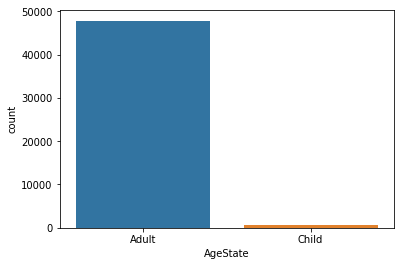

In [98]:
sns.countplot(x='AgeState', data=df_no_outliers)

**fnlwgt** column is not an important feature. 

In [99]:
df_no_outliers.drop('fnlwgt', axis=1, inplace=True)

In [100]:
df_no_outliers.head()

,Age,Workclass,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Hours-per-week,Country,Income,Capital-State,AgeState
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174,Adult
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0,Adult
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0,Adult
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0,Adult
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0,Adult


In [101]:
# Information about our data
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48404 entries, 0 to 16280
Data columns (total 13 columns):
Age               48404 non-null int64
Workclass         48404 non-null object
Education-Num     48404 non-null int64
Martial Status    48404 non-null object
Occupation        48404 non-null object
Relationship      48404 non-null object
Race              48404 non-null object
Sex               48404 non-null object
Hours-per-week    48404 non-null int64
Country           48404 non-null object
Income            48404 non-null object
Capital-State     48404 non-null int64
AgeState          48404 non-null object
dtypes: int64(4), object(9)
memory usage: 6.4+ MB


#### B- Categorical Feature encoding    
A machine learning model only works with numerical features. To do so, we need to encode all our categorical features. Those features are represented by **object**  with the help of the previous **info** command.    
We are going to perform the **One Hot Ending** method on all the categorical features by using Pandas **get_dummies()** function.  
We are not going to take in consideration **Income** column, because it is the column we try to predict.  

In [102]:
# Columns: Workclass, Martial Status Occupation, Relationship, Race, Sex, Country, AgeState
df_no_outliers = pd.get_dummies(df_no_outliers, columns=['Workclass', 'Martial Status', 'Occupation', 
                                 'Relationship', 'Race', 'Sex', 'Country', 'AgeState'])

In [103]:
df_no_outliers['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [104]:
'''
1: For those who make more than 50K 
0: For those who don't
'''
df_no_outliers['Income'] = np.where(df_no_outliers['Income'] =='>50K', 1, 0)

In [105]:
# Reorder columns : In order to have 'Income' as last feature.
columns = [column for column in df_no_outliers.columns if column != 'Income']
columns = columns + ['Income'] 
df = df_no_outliers[columns]

In [106]:
# Information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48404 entries, 0 to 16280
Data columns (total 89 columns):
Age                                     48404 non-null int64
Education-Num                           48404 non-null int64
Hours-per-week                          48404 non-null int64
Capital-State                           48404 non-null int64
Workclass_Federal-gov                   48404 non-null uint8
Workclass_Local-gov                     48404 non-null uint8
Workclass_Never-worked                  48404 non-null uint8
Workclass_Private                       48404 non-null uint8
Workclass_Self-emp-inc                  48404 non-null uint8
Workclass_Self-emp-not-inc              48404 non-null uint8
Workclass_State-gov                     48404 non-null uint8
Workclass_Without-pay                   48404 non-null uint8
Martial Status_Divorced                 48404 non-null uint8
Martial Status_Married-AF-spouse        48404 non-null uint8
Martial Status_Married-civ-spouse    

## 6- Preparation, Models and Evaluation    
#### 6.1- Data Preparation   
We need to split our dataset for training and testing data.  
80% of the data will be used for training and 20% for testing.

In [107]:
y = df.Income.ravel()
X = df.drop('Income', axis=1).as_matrix().astype('float')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [108]:
print('X shape: {} | y shape: {}'.format(X.shape, y.shape))

X shape: (48404, 88) | y shape: (48404,)


In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
print('X train shape: {} | y shape: {}'.format(X_train.shape, y_train.shape))
print('X test shape: {} | y shape: {}'.format(X_test.shape, y_test.shape))

X train shape: (38723, 88) | y shape: (38723,)
X test shape: (9681, 88) | y shape: (9681,)


#### 6.2- Models & Evaluation   
Before building any machine learning model. It is important to build a baseline model first, in order judge the performance of the upcoming models.  

##### Baseline Model

In [112]:
from sklearn.dummy import DummyClassifier

In [113]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)

In [114]:
# Train the model 
dummy_clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [115]:
print('Score of baseline model : {0:.2f}'.format(dummy_clf.score(X_test, y_test)))

Score of baseline model : 0.77


##### Logistic Regression 

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [117]:
lr_clf = LogisticRegression(random_state=0)
parameters = {'C':[1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty' : ['l1','l2']}
lr_clf = GridSearchCV(lr_clf, param_grid=parameters, cv=3)

In [118]:
lr_clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [119]:
lr_clf.best_params_

{'C': 10.0, 'penalty': 'l2'}

In [120]:
print('Best score : {0:.2f}'.format(lr_clf.best_score_))

Best score : 0.84


In [121]:
print('Score for logistic regression - on test : {0:.2f}'.format(lr_clf.score(X_test, y_test)))

Score for logistic regression - on test : 0.85


## 7- Next Step  
* Feature Normalization  and Standardization  
* Feature selection
* Use different models: Ensemble Technics 

**If you found this notebook helpful or you just liked it , some upvotes would be very much appreciated -  That will keep me motivated to update it on a regular basis** :-)